In [92]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, r2_score
from sklearn.tree import DecisionTreeClassifier

In [93]:
# load data breast cancer
url = 'https://raw.githubusercontent.com/nyomanyoga/Damin/master/Datasets_Breast_Cancer.csv'
data = pd.read_csv(url)

# menampilkan data dari dataframe kolom 0 sampai 10
data = data.iloc[:,0:10]

# conversi data ke object string
data = data.astype(str)

# mencari missing value
atr = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast-quad','irradiat']
for i in range (len(atr)):
  data.replace({atr[i]: {'?': np.nan}}, regex=False,inplace=True)

data.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [94]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [95]:
# Menghapus data kosong
data.dropna(inplace=True)

# drop colom
data=data.drop(columns=['breast'])

In [96]:
# normalisasi data to numeric
for i in range(len(atr)):
  data.to_numpy()[:,i]=LabelEncoder().fit_transform(data.to_numpy()[:,i])

# convert to numeric
for j in range(len(atr)):
  data[atr[j]] = pd.to_numeric(data[atr[j]])

# normalisasi data with minmax
minmax=preprocessing.MinMaxScaler().fit_transform(data)
data=pd.DataFrame(minmax, index=data.index, columns=data.columns)

data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,0.0,0.2,1.0,0.5,0.000000,0.0,1.0,0.25,0.0
1,0.0,0.4,1.0,0.3,0.000000,0.0,0.5,1.00,0.0
2,0.0,0.4,1.0,0.3,0.000000,0.0,0.5,0.25,0.0
3,0.0,0.8,0.0,0.2,0.000000,0.0,0.5,0.50,0.0
4,0.0,0.4,1.0,0.0,0.000000,0.0,0.5,0.75,0.0
...,...,...,...,...,...,...,...,...,...
281,1.0,0.2,1.0,0.5,0.000000,0.0,0.5,0.50,0.0
282,1.0,0.2,1.0,0.3,0.000000,0.0,1.0,0.50,1.0
283,1.0,0.8,0.0,0.3,0.000000,0.0,0.0,0.50,0.0
284,1.0,0.4,0.0,0.5,0.666667,0.0,1.0,0.25,0.0


Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast-quad', 'irradiat'],
      dtype='object')


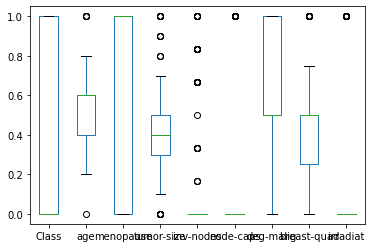

In [97]:
print(data.columns)
data.plot(kind='box')
# data.hist()

# data.info()

In [98]:
# Menghapus outlier
data=data[(data['tumor-size']<0.8) & (data['tumor-size']<0.8)]

data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,0.0,0.2,1.0,0.5,0.000000,0.0,1.0,0.25,0.0
1,0.0,0.4,1.0,0.3,0.000000,0.0,0.5,1.00,0.0
2,0.0,0.4,1.0,0.3,0.000000,0.0,0.5,0.25,0.0
3,0.0,0.8,0.0,0.2,0.000000,0.0,0.5,0.50,0.0
4,0.0,0.4,1.0,0.0,0.000000,0.0,0.5,0.75,0.0
...,...,...,...,...,...,...,...,...,...
281,1.0,0.2,1.0,0.5,0.000000,0.0,0.5,0.50,0.0
282,1.0,0.2,1.0,0.3,0.000000,0.0,1.0,0.50,1.0
283,1.0,0.8,0.0,0.3,0.000000,0.0,0.0,0.50,0.0
284,1.0,0.4,0.0,0.5,0.666667,0.0,1.0,0.25,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc65485a58>,
      dtype=object)

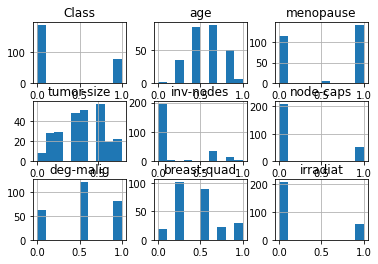

In [99]:
data.hist()

In [100]:
y = data['Class']
x = data.drop(columns=['Class'])

# Membagi data train dengan data test (80 : 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Naive Bayes and Decision Tree

In [101]:
# Naive Bayes Library
NB = GaussianNB()
NB.fit(x_train, y_train)
y_predict2 = NB.predict(x_test)

# Decision Tree
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [102]:
print("Presision")
print('Decision Tree\t:',precision_score(y_test, y_pred)*100, '%')
print('Naive Bayes\t:',precision_score(y_test, y_predict2)*100, '%')

print('\n')

print("Accuracy")
print('Decision Tree\t:',accuracy_score(y_test, y_pred)*100, '%')
print('Naive Bayes\t:',accuracy_score(y_test, y_predict2)*100, '%')

print('\n')

print("Decision Tree")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("========================================================")
print("Naive Bayes")
print(confusion_matrix(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

Presision
Decision Tree	: 42.10526315789473 %
Naive Bayes	: 68.75 %


Accuracy
Decision Tree	: 66.0377358490566 %
Naive Bayes	: 83.01886792452831 %


Decision Tree
[[27 11]
 [ 7  8]]
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        38
         1.0       0.42      0.53      0.47        15

    accuracy                           0.66        53
   macro avg       0.61      0.62      0.61        53
weighted avg       0.69      0.66      0.67        53

Naive Bayes
[[33  5]
 [ 4 11]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        38
         1.0       0.69      0.73      0.71        15

    accuracy                           0.83        53
   macro avg       0.79      0.80      0.79        53
weighted avg       0.83      0.83      0.83        53



In [103]:
# df_DecisionTree=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# df_DecisionTree

In [104]:
# df_NaiveBayes=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict2})
# df_NaiveBayes

Referensi

https://kuliahtif.wordpress.com/2019/12/10/klasifikasi-data-dengan-algoritma-decision-tree-menggunakan-sklearn-python/

https://www.megabagus.id/machine-learning-decision-tree-classification/2/

https://medium.com/warung-pintar/beberapa-cara-untuk-preprocessing-data-dalam-machine-learning-13cef4294614

https://inixindojogja.co.id/memulai-machine-learning-di-python-bagian-2/